In [1]:
!pip install wbdata

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wbdata as wb


In [3]:
wb.search_indicators("CO2 emission")

id                    name
--------------------  ---------------------------------------------------------------------------------------------------------------------------------
CC.CO2.EMSE.BF        CO2 emissions by sector (Mt CO2 eq) - Bunker Fuels
CC.CO2.EMSE.BL        CO2 emissions by sector (Mt CO2 eq) - Building
CC.CO2.EMSE.EL        CO2 emissions by sector (Mt CO2 eq) - Total excluding LUCF
CC.CO2.EMSE.EN        CO2 emissions by sector (Mt CO2 eq) - Energy
CC.CO2.EMSE.FE        CO2 emissions by sector (Mt CO2 eq) - Fugitive Emissions
CC.CO2.EMSE.IL        CO2 emissions by sector (Mt CO2 eq) - Total including LUCF
CC.CO2.EMSE.IP        CO2 emissions by sector (Mt CO2 eq) - Industrial Processes
CC.CO2.EMSE.LU        CO2 emissions by sector (Mt CO2 eq) - Land-Use Change and Forestry
CC.CO2.EMSE.MC        CO2 emissions by sector (Mt CO2 eq) - Manufacturing/Construction
CC.CO2.EMSE.TR        CO2 emissions by sector (Mt CO2 eq) - Transportation
CC.CPAT.ACAE.SI       Absolute change i

In [4]:
indicators = {"EN.ATM.CO2E.KT":"CO2_emission"}
df_wb = wb.get_dataframe(indicators, convert_date=True)
df_wb.reset_index(inplace = True)

In [5]:
indicators={"EN.ATM.CO2E.KT":"CO2_emission"}
countries=["EUU"]
df_wb_1=wb.get_dataframe(indicators, country=countries, convert_date=True)

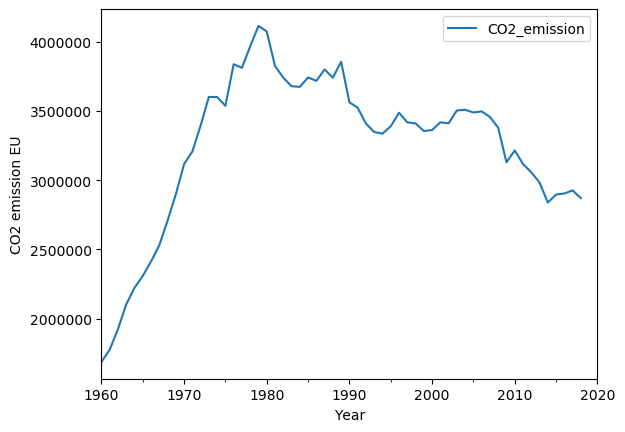

In [6]:
df_wb_1.plot()
plt.ylabel('CO2 emission EU')
plt.xlabel('Year')
plt.show()

In [7]:
import scipy as sc
import sklearn as sk
import statsmodels as st

In [8]:
df_wb_1.dropna(inplace=True)

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt

df_wb_1.dropna(inplace=True)
X = df_wb_1.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
for i in range(len(test)):
	
	yhat = history[-1]
	predictions.append(yhat)
	
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=3562660.000, Expected=3855628
>Predicted=3855628.250, Expected=3740672
>Predicted=3740672.000, Expected=3800176
>Predicted=3800176.250, Expected=3717496
>Predicted=3717496.500, Expected=3742372
>Predicted=3742372.000, Expected=3674225
>Predicted=3674224.750, Expected=3678981
>Predicted=3678981.250, Expected=3740678
>Predicted=3740677.750, Expected=3825160
>Predicted=3825160.500, Expected=4074379
>Predicted=4074379.250, Expected=4114434
>Predicted=4114434.250, Expected=3967127
>Predicted=3967127.250, Expected=3811572
>Predicted=3811572.500, Expected=3837936
>Predicted=3837936.000, Expected=3537180
>Predicted=3537180.500, Expected=3600835
>Predicted=3600834.750, Expected=3601854
>Predicted=3601853.500, Expected=3394659
>Predicted=3394658.750, Expected=3207028
>Predicted=3207028.000, Expected=3116398
>Predicted=3116397.750, Expected=2897624
>Predicted=2897623.750, Expected=2707669
>Predicted=2707669.000, Expected=2530015
>Predicted=2530014.750, Expected=2412860
>Predicted=24128

In [10]:
split_point = len(df_wb_1) - 15
dataset, validation = df_wb_1[0:split_point], df_wb_1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 44, Validation 15


In [11]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

df_wb_1.dropna(inplace=True)

def evaluate_arima_model(X, arima_order):
	
	X = df_wb_1.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])

	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse

def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(df_wb_1.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [12]:
from statsmodels.tsa.stattools import adfuller
df_wb_1.dropna(inplace=True)

X = df_wb_1['CO2_emission'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.009429
p-value: 0.957745
Critical Values:
	1%: -3.553
	5%: -2.915
	10%: -2.595


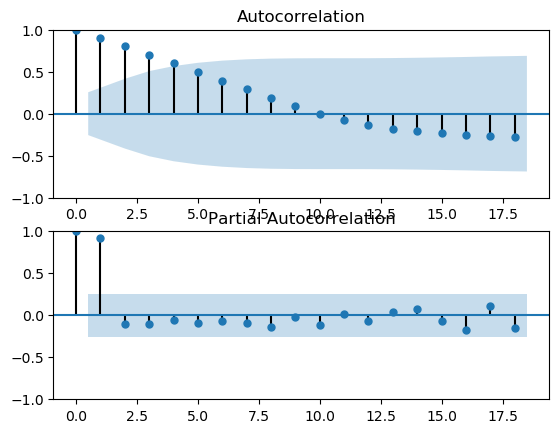

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure()
pyplot.subplot(211)
plot_acf(df_wb_1, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(df_wb_1, ax=pyplot.gca())
pyplot.show()

In [14]:
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

df_wb_1.dropna(inplace=True)

X = df_wb_1.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
for i in range(len(test)):

	model = ARIMA(history, order=(1,1,0), trend='n')
	model_fit = model.fit()
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)

	obs = test[i]
	history.append(obs)

residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())

                   0
count      30.000000
mean   -60579.324219
std    133288.343750
min   -301321.000000
25%   -151552.875000
50%    -85056.875000
75%     28896.687500
max    292161.250000


In [15]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
import numpy

import pickle

warnings.filterwarnings("ignore")

def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
 
ARIMA.__getnewargs__ = __getnewargs__

df_wb_1.dropna(inplace=True)
X = df_wb_1.values
X = X.astype('float32')

model = ARIMA(X, order=(1,1,0), trend='n')
model_fit = model.fit()

bias = -60579
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)
#model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

AttributeError: 'ARIMA' object has no attribute 'k_lags'

In [ ]:
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMAResults

model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = bias + float(model_fit.forecast()[0])
print('Predicted: %.3f' % yhat)